In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import Libraries

In [10]:
import numpy as np
import pandas as pd


from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [11]:
dataset = pd.read_csv('/content/drive/MyDrive/one_hot_encoded_dataset.csv')
dataset.head()

,type,flight_month,num_of_stops,formatted_price,distance_bet_2_countries,one_stop_in,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,1,2,1,54306,0.984105,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,2,1,17829,0.755223,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,1,14150,0.451862,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,2,1,13258,0.258401,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,2,0,6363,0.653497,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


# **Spliting the Dataset**

In [12]:
y_train = dataset['formatted_price'][:192167]
y_test = dataset['formatted_price'][192167:]

dataset.drop(columns=['formatted_price','one_stop_in'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [13]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

# **Modeling**

In [14]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[21:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.9436360498325455
Test Score: 0.9594765338269255
r2_score: 0.9594765338269255
MSE: 20859920.533172548
RMSE: 4567.266199070572
MAE: 2688.5061415231303
----------------------------------------


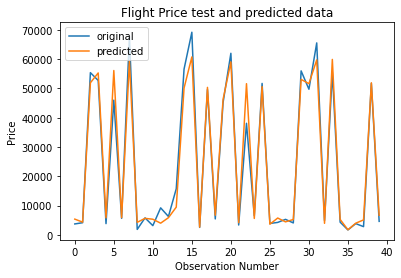

----------------------------------------
Using model: PR
Training Score: 0.9296330430965987
Test Score: 0.9477189558224629
r2_score: 0.9401086491691732
MSE: 30829762.035151694
RMSE: 5552.455496008202
MAE: 3673.412577457249
----------------------------------------


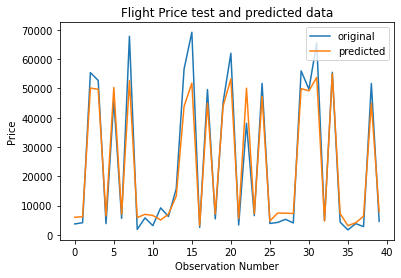

----------------------------------------
Using model: HGBR
Training Score: 0.9544346938325325
Test Score: 0.96809848477256
r2_score: 0.96809848477256
MSE: 16421672.067488551
RMSE: 4052.3662306717233
MAE: 2284.6786569780925
----------------------------------------


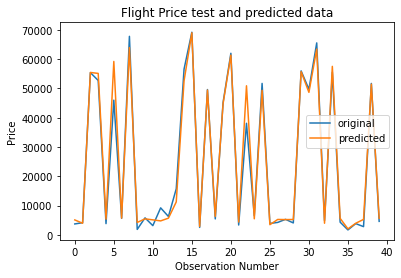

----------------------------------------
Using model: LGBMR
Training Score: 0.9543684088381323
Test Score: 0.9681562751056523
r2_score: 0.9681562751056523
MSE: 16391923.828511592
RMSE: 4048.694089272687
MAE: 2282.1987405977625
----------------------------------------


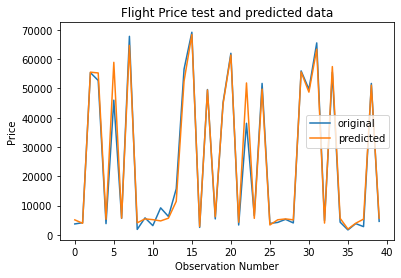

----------------------------------------
Using model: LR
Training Score: 0.9038756373677859
Test Score: 0.9211493110634286
r2_score: 0.9211493110634286
MSE: 40589299.49816781
RMSE: 6370.973198669714
MAE: 4243.8369144284825
----------------------------------------


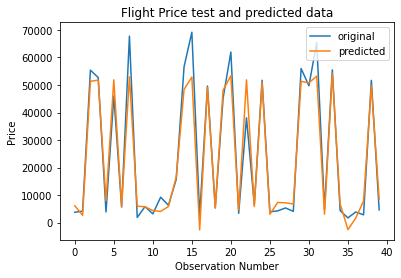

----------------------------------------
Using model: GBR
Training Score: 0.9437289710934681
Test Score: 0.959534263892477
r2_score: 0.959534263892477
MSE: 20830203.317605823
RMSE: 4564.011756953068
MAE: 2681.4659917585923
----------------------------------------


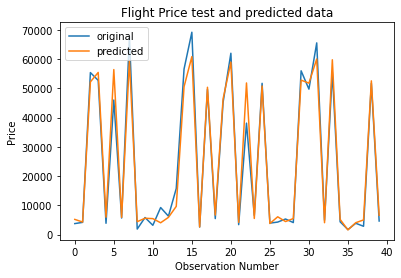

----------------------------------------
Using model: ETR
Training Score: 0.9619845843983686
Test Score: 0.9689709436792976
r2_score: 0.9689709436792976
MSE: 15972563.805493481
RMSE: 3996.56900422018
MAE: 2042.2455160964514
----------------------------------------


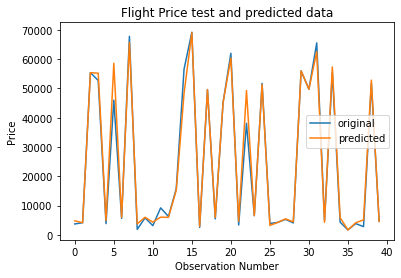

----------------------------------------
Using model: BR
Training Score: 0.9614836237842082
Test Score: 0.9689514842738567
r2_score: 0.9689514842738567
MSE: 15982580.758371752
RMSE: 3997.8220018369693
MAE: 2045.1741601770489
----------------------------------------


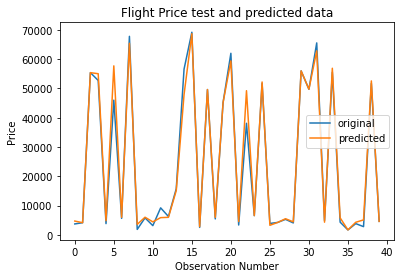

----------------------------------------
Using model: DT
Training Score: 0.9619845843983685
Test Score: 0.9690114657911507
r2_score: 0.9690114657911507
MSE: 15951704.582112081
RMSE: 3993.958510314307
MAE: 2041.3321339282304
----------------------------------------


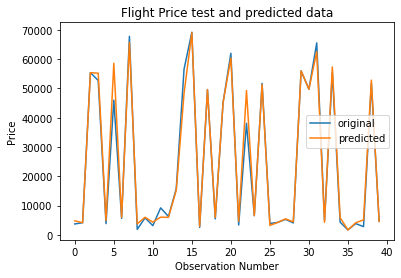

----------------------------------------
Using model: RF
Training Score: 0.9618416337293351
Test Score: 0.9691371607135079
r2_score: 0.9691371607135079
MSE: 15887001.674404351
RMSE: 3985.850182132333
MAE: 2040.9157539625128
----------------------------------------


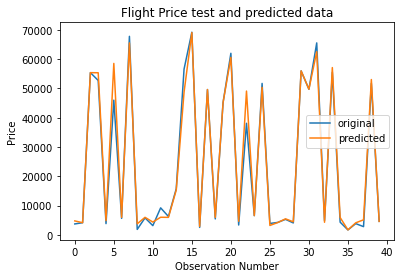

----------------------------------------


In [15]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)

    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)


